Automatically created module for IPython interactive environment
Mean Squared error:  0.140282131661


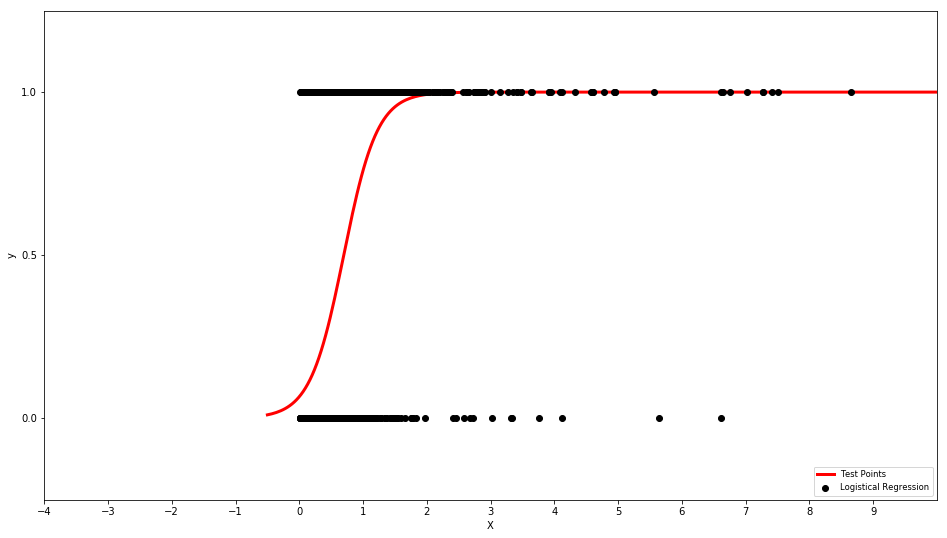

In [10]:
print(__doc__)


# Code source: Gael Varoquaux
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import linear_model
from sklearn import metrics

def getData(filePath):
    data = np.genfromtxt(filePath, delimiter=',')
    x, y = np.array(data[:,0:-1], dtype=float), np.array(data[:,-1],dtype=float)
    return x,y

all_x,all_y = getData('data/all-flippedRegistrationStatus.csv')

# create a bunch of random numbers for our 80/20 train/test split
rnd_indices = np.random.rand(len(all_x)) < 0.80

# separate train and test values
train_x = all_x[rnd_indices]
train_y = all_y[rnd_indices]
test_x = all_x[~rnd_indices]
test_y = all_y[~rnd_indices]

# this is our test set, it's just a straight line with some
# Gaussian noise
xmin, xmax = 0, 24

X = train_x
y = train_y
# run the classifier
clf = linear_model.LogisticRegression(C=1e5)
clf.fit(X, y)

# and plot the result
plt.figure(1, figsize=(16, 9))
plt.clf()
plt.scatter(X.ravel(), y, color='black', zorder=20)
X_test = np.linspace(-0.5, 10, 300)


def model(x):
    return 1 / (1 + np.exp(-x))
loss = model(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color='red', linewidth=3)

y_pred = clf.predict(test_x)
msqe = metrics.mean_squared_error(test_y, y_pred)
print("Mean Squared error: ",msqe)

# plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)
# plt.axhline(.5, color='.5')

plt.ylabel('y')
plt.xlabel('X')
plt.xticks(range(-5, 10))
plt.yticks([0, 0.5, 1])
plt.ylim(-.25, 1.25)
plt.xlim(-4, 10)
plt.legend(('Test Points', 'Logistical Regression'),
           loc="lower right", fontsize='small')
plt.show()